In [1]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
import libs
from scipy.stats import norm


In [2]:
# Set global theme settings for plotting
plt.rcParams.update({
    'font.size': 20,          # Set font size
    'lines.linewidth': 3,     # Set default line thickness
    'axes.titlesize': 20,     # Title font size
    'axes.labelsize': 18,     # Axis label font size
    'xtick.labelsize': 14,    # X-tick label font size
    'ytick.labelsize': 14,    # Y-tick label font size
    'grid.color': 'gray',     # Grid color
    'grid.linestyle': '--',   # Grid line style
    'grid.linewidth': 0.5,    # Grid line width
    'legend.fontsize': 16     # Legend font size
})

In [3]:
human_Ud = 2.0
Kimetalsd = -0.009
human_popsize = 10000
mean_segregating = -human_Ud/Kimetalsd
stdv_segregating = np.sqrt(-human_Ud/Kimetalsd)
iterations = 1000

expected_min_Kim, std_error_min_Kim, expected_max_Kim, std_error_max_Kim = libs.get_expected_min_max_poisson_sample(mean_segregating, human_popsize, iterations)
interval_span = 10
segregating_mutations = np.linspace(expected_min_Kim-interval_span, expected_max_Kim+interval_span, 100)

In [4]:
#Defines the fitnes function following Kondrashov 1995 Unconditionally deleterious mutations paper
#x is the number of segregating mutations
#w_m is the point where fitness is on its half value
#w_w is the width of the linear drop in fitness from 0 to one
#w_m and w_w are in units of standarized segregating mutations

def singleValue_Fitnessfunc(segregating_mutations, museg, stdv_segregating, w_m, w_w):
    x = (segregating_mutations-museg)/stdv_segregating
    if x <= w_m-w_w/2:
        return 1.0
    elif x < w_m+w_w/2:
        return w_m/w_w - x/w_w + 1/2
    else:
        return 0
    
Value_Fitnessfunc = np.vectorize(singleValue_Fitnessfunc)

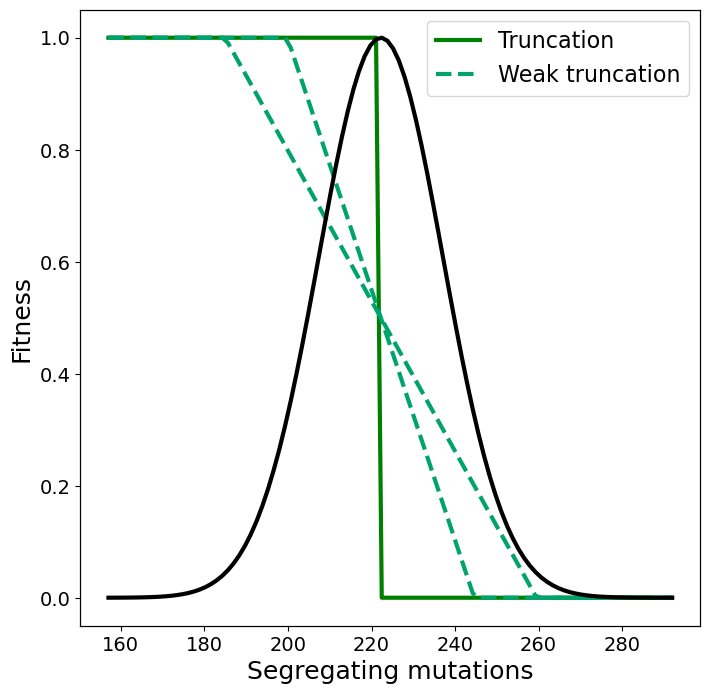

In [6]:
# Generatinf segregating mutations pdf
pdf = norm.pdf(segregating_mutations, mean_segregating, stdv_segregating)
Thresh_w_m = 0
Thresh_w_w = 0

Weak_w_m1 = 0
Weak_w_w1 = 3

Weak_w_m2 = 0
Weak_w_w2 = 5

ThreshFitness = Value_Fitnessfunc(segregating_mutations, mean_segregating, stdv_segregating, Thresh_w_m, Thresh_w_w)
WeakFitness1 = Value_Fitnessfunc(segregating_mutations, mean_segregating, stdv_segregating, Weak_w_m1, Weak_w_w1)
WeakFitness2 = Value_Fitnessfunc(segregating_mutations, mean_segregating, stdv_segregating, Weak_w_m2, Weak_w_w2)

# Plot the PDF
#plt.plot(x, pdf, color='lightblue')
#plt.ylabel('Probability Density')
COLOR_PMF = "black"

fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()
ax1.plot(segregating_mutations, ThreshFitness, color='green', label='Truncation')
ax1.plot(segregating_mutations, WeakFitness1, color='#00A36C', linestyle='dashed', label='Weak truncation')
ax1.plot(segregating_mutations, WeakFitness2, color='#00A36C', linestyle='dashed')
ax1.set_xlabel('Segregating mutations')
ax1.set_ylabel('Fitness')
ax1.legend()

ax2.plot(segregating_mutations, pdf,  color=COLOR_PMF)
ax2.get_yaxis().set_visible(False)

#ax2.fill_between(segregating_mutations, pdf, 0, color=COLOR_PMF, alpha=0.5)

fig.savefig('graphs/Kondrashov1995_model.png', bbox_inches='tight') 